# STUDYING ATP MATCHES FROM 2018-2021
https://www.kaggle.com/datasets/valentinfiorenza/tennis-data

## Exploratory Data Analysis

In [824]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [825]:
tennis = pd.read_csv('tennis_data.csv',low_memory=False)
tennis.head(5)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,pl1_flag,pl1_year_pro,pl1_weight,pl1_height,pl1_hand,pl2_flag,pl2_year_pro,pl2_weight,pl2_height,pl2_hand
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,KOR,2015.0,72.0,180.0,Right-Handed,JPN,2014.0,64.0,170.0,Left-Handed
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,BRA,2011.0,78.0,183.0,Left-Handed,GER,2014.0,80.0,188.0,Right-Handed
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,SRB,2013.0,80.0,185.0,Right-Handed,ESP,2011.0,76.0,180.0,Right-Handed
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,USA,2012.0,86.0,188.0,Right-Handed,AUS,2018.0,85.0,188.0,Right-Handed
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,FRA,2016.0,71.0,175.0,Left-Handed,DEN,2020.0,77.0,188.0,Right-Handed


In [826]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35923 entries, 0 to 35922
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ATP           35923 non-null  int64  
 1   Location      35923 non-null  object 
 2   Tournament    35923 non-null  object 
 3   Date          35923 non-null  object 
 4   Series        35923 non-null  object 
 5   Court         35923 non-null  object 
 6   Surface       35923 non-null  object 
 7   Round         35923 non-null  object 
 8   Best of       35923 non-null  int64  
 9   Winner        35923 non-null  object 
 10  Loser         35923 non-null  object 
 11  WRank         35910 non-null  float64
 12  LRank         35843 non-null  float64
 13  WPts          35912 non-null  float64
 14  LPts          35844 non-null  float64
 15  W1            35692 non-null  float64
 16  L1            35695 non-null  float64
 17  W2            35353 non-null  float64
 18  L2            35353 non-nu

In [827]:
tennis.describe()

,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,...,SJW,SJL,UBW,UBL,pl1_year_pro,pl1_weight,pl1_height,pl2_year_pro,pl2_weight,pl2_height
count,35923.000000,35923.000000,35910.000000,35843.000000,35912.000000,35844.000000,35692.000000,35695.000000,35353.000000,35353.000000,...,15572.000000,15579.000000,5309.000000,5309.000000,35881.000000,35881.000000,35881.000000,35339.000000,35339.000000,35339.000000
mean,31.830053,3.395290,57.532303,88.603828,1976.910977,1142.708905,5.804522,4.095728,5.784742,3.936215,...,1.796538,3.557943,1.819319,3.567555,2004.952064,80.864524,186.994426,2005.034155,79.961855,186.342964
std,18.070878,0.796457,71.095495,111.218731,2411.581458,1301.782291,1.228795,1.833657,1.247309,1.862776,...,1.004273,3.272510,1.038893,3.412837,5.155128,7.884984,11.991244,11.854770,7.523033,19.801235
min,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.010000,1.010000,1.020000,1989.000000,7.000000,10.000000,0.000000,7.000000,10.000000
25%,18.000000,3.000000,16.000000,34.000000,701.000000,549.000000,6.000000,3.000000,6.000000,3.000000,...,1.220000,1.730000,1.230000,1.750000,2001.000000,75.000000,183.000000,2001.000000,75.000000,183.000000
50%,31.000000,3.000000,41.000000,63.000000,1079.000000,805.000000,6.000000,4.000000,6.000000,4.000000,...,1.500000,2.630000,1.500000,2.520000,2004.000000,80.000000,185.000000,2004.000000,80.000000,185.000000
75%,48.000000,3.000000,76.000000,102.000000,2050.000000,1225.000000,6.000000,6.000000,6.000000,6.000000,...,2.000000,4.000000,2.030000,4.000000,2008.000000,85.000000,191.000000,2008.000000,84.000000,191.000000
max,67.000000,5.000000,1890.000000,2159.000000,16950.000000,16950.000000,7.000000,7.000000,7.000000,7.000000,...,19.000000,81.000000,18.000000,50.000000,2021.000000,108.000000,1883.000000,2021.000000,108.000000,1883.000000


### aggregate data

In [828]:
columns_to_keep = ['ATP','Date','Round','Tournament','Series','Court','Surface','Winner','Loser','WRank','LRank','Wsets','Lsets','Best of']

In [829]:
tennis_clean = tennis[columns_to_keep]

In [830]:
tennis_clean

,ATP,Date,Round,Tournament,Series,Court,Surface,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of
0,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3
1,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3
2,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3
3,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3
4,1,2022-01-04,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35918,65,2008-11-14,Round Robin,Masters Cup,Masters Cup,Indoor,Hard,Simon G.,Stepanek R.,9.0,27.0,2.0,0.0,3
35919,65,2008-11-14,Round Robin,Masters Cup,Masters Cup,Indoor,Hard,Murray A.,Federer R.,4.0,2.0,2.0,1.0,3
35920,65,2008-11-15,Semifinals,Masters Cup,Masters Cup,Indoor,Hard,Djokovic N.,Simon G.,3.0,9.0,2.0,1.0,3
35921,65,2008-11-15,Semifinals,Masters Cup,Masters Cup,Indoor,Hard,Davydenko N.,Murray A.,5.0,4.0,2.0,0.0,3


Remove outdated tournament series

In [831]:
tennis_clean.groupby(['Series'])['Date'].max()

Series
ATP250                2022-02-13
ATP500                2022-02-13
Grand Slam            2022-01-30
International         2008-10-26
International Gold    2008-10-12
Masters               2008-11-02
Masters 1000          2021-11-07
Masters Cup           2021-11-21
Name: Date, dtype: object

In [832]:
tennis_clean = tennis_clean[~tennis_clean['Series'].isin(['International','International Gold','Masters','Masters Cup'])]

Connect series types to ranking points won

In [833]:
series_ranking_dict = {'ATP250':250,'ATP500':500,'Masters1000':1000,'Grand Slam':2000}
series_ranking = pd.DataFrame.from_dict(series_ranking_dict,orient='index',columns=['SeriesPoints']).reset_index().rename(columns={'index': 'Series'})
tennis_clean = tennis_clean.merge(series_ranking,on='Series',how='inner')
tennis_clean.head(5)

,ATP,Date,Round,Tournament,Series,Court,Surface,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints
0,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250
1,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250
2,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250
3,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250
4,1,2022-01-04,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250


In [834]:
tennis_clean['Round'].value_counts()
rounds_ranking = {'1st Round':0,'2nd Round':1,'3rd Round':2,'4th Round':3,'Quarterfinals':4,'Semifinals':5,'The Final':6,'Round Robin':3}
rounds_ranking = pd.DataFrame.from_dict(rounds_ranking,orient='index',columns=['RoundDraw']).reset_index().rename(columns={'index': 'Round'})

tennis_clean = tennis_clean.merge(rounds_ranking,on='Round',how='inner')
tennis_clean

,ATP,Date,Round,Tournament,Series,Court,Surface,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw
0,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250,0
1,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250,0
2,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250,0
3,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250,0
4,1,2022-01-04,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,51,2008-09-02,4th Round,US Open,Grand Slam,Outdoor,Hard,Murray A.,Wawrinka S.,6.0,10.0,3.0,0.0,5,2000,3
26620,51,2008-09-02,4th Round,US Open,Grand Slam,Outdoor,Hard,Djokovic N.,Robredo T.,3.0,15.0,3.0,2.0,5,2000,3
26621,51,2008-09-02,4th Round,US Open,Grand Slam,Outdoor,Hard,Muller G.,Davydenko N.,130.0,5.0,3.0,1.0,5,2000,3
26622,51,2008-09-02,4th Round,US Open,Grand Slam,Outdoor,Hard,Federer R.,Andreev I.,2.0,23.0,3.0,2.0,5,2000,3


In [835]:
tennis_clean['Type'] = tennis_clean['Court'] +"_"+ tennis_clean['Surface']

In [836]:
tennis_clean = tennis_clean.drop(['Tournament','Series','Round','Surface','Court'],axis=1)

In [837]:
tennis_clean['Date'] = pd.to_datetime(tennis_clean['Date'])
tennis_clean['Year'] = tennis_clean['Date'].dt.year

In [838]:
tennis_clean.head(10)

,ATP,Date,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year
0,1,2022-01-03,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250,0,Outdoor_Hard,2022
1,1,2022-01-03,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250,0,Outdoor_Hard,2022
2,1,2022-01-03,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250,0,Outdoor_Hard,2022
3,1,2022-01-03,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250,0,Outdoor_Hard,2022
4,1,2022-01-04,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250,0,Outdoor_Hard,2022
5,1,2022-01-04,Daniel T.,Musetti L.,125.0,59.0,2.0,1.0,3,250,0,Outdoor_Hard,2022
6,1,2022-01-04,Gerasimov E.,Fucsovics M.,113.0,40.0,2.0,0.0,3,250,0,Outdoor_Hard,2022
7,1,2022-01-04,Ymer M.,Bonzi B.,94.0,64.0,2.0,0.0,3,250,0,Outdoor_Hard,2022
8,1,2022-01-04,Cerundolo J.M.,Bolt A.,90.0,137.0,2.0,0.0,3,250,0,Outdoor_Hard,2022
9,1,2022-01-04,Paul T.,Vesely J.,43.0,83.0,2.0,1.0,3,250,0,Outdoor_Hard,2022


In [839]:
def generate_H2H(row):
    h2h = [row['Loser'],row['Winner']]
    h2h = sorted(h2h)
    return str(h2h[0])+ "_"+ str(h2h[1])

tennis_clean['H2H'] = tennis_clean.apply(generate_H2H, axis=1)
tennis_clean[tennis_clean['H2H']=='Djokovic N._Nadal R.']

,ATP,Date,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year,H2H
22044,33,2015-06-03,Djokovic N.,Nadal R.,1.0,7.0,3.0,0.0,5,2000,4,Outdoor_Clay,2015,Djokovic N._Nadal R.
23765,30,2021-06-11,Djokovic N.,Nadal R.,1.0,3.0,3.0,1.0,5,2000,5,Outdoor_Clay,2021,Djokovic N._Nadal R.
23789,40,2018-07-14,Djokovic N.,Nadal R.,21.0,1.0,3.0,2.0,5,2000,5,Outdoor_Grass,2018,Djokovic N._Nadal R.
23826,32,2013-06-07,Nadal R.,Djokovic N.,4.0,1.0,3.0,2.0,5,2000,5,Outdoor_Clay,2013,Djokovic N._Nadal R.
23866,31,2008-06-06,Nadal R.,Djokovic N.,2.0,3.0,3.0,0.0,5,2000,5,Outdoor_Clay,2008,Djokovic N._Nadal R.
24355,3,2016-01-09,Djokovic N.,Nadal R.,1.0,5.0,2.0,0.0,3,250,6,Outdoor_Hard,2016,Djokovic N._Nadal R.
24676,22,2020-10-11,Nadal R.,Djokovic N.,2.0,1.0,3.0,0.0,5,2000,6,Outdoor_Clay,2020,Djokovic N._Nadal R.
24677,6,2019-01-27,Djokovic N.,Nadal R.,1.0,2.0,3.0,0.0,5,2000,6,Outdoor_Hard,2019,Djokovic N._Nadal R.
24698,32,2014-06-08,Nadal R.,Djokovic N.,1.0,2.0,3.0,1.0,5,2000,6,Outdoor_Clay,2014,Djokovic N._Nadal R.
24704,51,2013-09-09,Nadal R.,Djokovic N.,2.0,1.0,3.0,1.0,5,2000,6,Outdoor_Hard,2013,Djokovic N._Nadal R.


In [840]:
worst_rank = max(tennis_clean['LRank'].max(),tennis_clean['WRank'].max())
tennis_clean['LRank'] = tennis_clean['LRank'].fillna(worst_rank)
tennis_clean['WRank'] = tennis_clean['WRank'].fillna(worst_rank)

In [841]:
tennis_clean['QualityWin'] = tennis_clean['Wsets']-tennis['Lsets']
tennis_clean['QualityWin'] = tennis_clean['QualityWin'].fillna(1)
tennis_clean

,ATP,Date,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year,H2H,QualityWin
0,1,2022-01-03,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250,0,Outdoor_Hard,2022,Kwon S.W._Nishioka Y.,2.0
1,1,2022-01-03,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250,0,Outdoor_Hard,2022,Altmaier D._Monteiro T.,1.0
2,1,2022-01-03,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250,0,Outdoor_Hard,2022,Carballes Baena R._Djere L.,2.0
3,1,2022-01-03,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250,0,Outdoor_Hard,2022,Johnson S._Vukic A.,1.0
4,1,2022-01-04,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250,0,Outdoor_Hard,2022,Moutet C._Rune H.,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,51,2008-09-02,Murray A.,Wawrinka S.,6.0,10.0,3.0,0.0,5,2000,3,Outdoor_Hard,2008,Murray A._Wawrinka S.,2.0
26620,51,2008-09-02,Djokovic N.,Robredo T.,3.0,15.0,3.0,2.0,5,2000,3,Outdoor_Hard,2008,Djokovic N._Robredo T.,2.0
26621,51,2008-09-02,Muller G.,Davydenko N.,130.0,5.0,3.0,1.0,5,2000,3,Outdoor_Hard,2008,Davydenko N._Muller G.,2.0
26622,51,2008-09-02,Federer R.,Andreev I.,2.0,23.0,3.0,2.0,5,2000,3,Outdoor_Hard,2008,Andreev I._Federer R.,3.0


## Predict what will be the next results for a certain player

importing models from scikit learn

In [842]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import scores
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


Preparing Features for Modelling

In [843]:
tennis_clean

,ATP,Date,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year,H2H,QualityWin
0,1,2022-01-03,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250,0,Outdoor_Hard,2022,Kwon S.W._Nishioka Y.,2.0
1,1,2022-01-03,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250,0,Outdoor_Hard,2022,Altmaier D._Monteiro T.,1.0
2,1,2022-01-03,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250,0,Outdoor_Hard,2022,Carballes Baena R._Djere L.,2.0
3,1,2022-01-03,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250,0,Outdoor_Hard,2022,Johnson S._Vukic A.,1.0
4,1,2022-01-04,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250,0,Outdoor_Hard,2022,Moutet C._Rune H.,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,51,2008-09-02,Murray A.,Wawrinka S.,6.0,10.0,3.0,0.0,5,2000,3,Outdoor_Hard,2008,Murray A._Wawrinka S.,2.0
26620,51,2008-09-02,Djokovic N.,Robredo T.,3.0,15.0,3.0,2.0,5,2000,3,Outdoor_Hard,2008,Djokovic N._Robredo T.,2.0
26621,51,2008-09-02,Muller G.,Davydenko N.,130.0,5.0,3.0,1.0,5,2000,3,Outdoor_Hard,2008,Davydenko N._Muller G.,2.0
26622,51,2008-09-02,Federer R.,Andreev I.,2.0,23.0,3.0,2.0,5,2000,3,Outdoor_Hard,2008,Andreev I._Federer R.,3.0


In [844]:
def prep_features(df,player_name):
    type_dummy = pd.get_dummies(df['Type'])

    opponents =  pd.DataFrame(np.where(df['Winner']==player_name,df['Loser'],df['Winner']),columns=['Opponent'])
    opponents_dummy = pd.get_dummies(opponents['Opponent'])

    features = ['WRank','LRank','SeriesPoints','RoundDraw','QualityWin']
    scl = StandardScaler()
    matches_scaled = scl.fit_transform(df[features])
    matches_scaled_df = pd.DataFrame(matches_scaled, columns=features)

    goal = pd.DataFrame(np.where(df['Winner']==player_name,1,0),columns=['Winner'])

    final_df = pd.concat([matches_scaled_df,type_dummy,goal,opponents_dummy,df['index']],axis=1)

    return final_df

In [845]:
player_name = 'Gasquet R.'
matches = tennis_clean[tennis_clean['H2H'].str.contains(player_name)].reset_index()

matches_ready = prep_features(matches,player_name)
matches_ready

,WRank,LRank,SeriesPoints,RoundDraw,QualityWin,Indoor_Hard,Outdoor_Clay,Outdoor_Grass,Outdoor_Hard,Winner,...,Whittington A.,Ymer M.,Youzhny M.,Zeballos H.,Zemlja G.,Zhang Z.,Zopp J.,Zverev A.,Zverev M.,index
0,1.186486,-0.372315,-0.734712,-1.002747,0.260199,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,70
1,4.530241,-0.267406,-0.734712,-1.002747,0.260199,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,163
2,0.484016,1.240659,-0.734712,-1.002747,-1.069077,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,236
3,0.540214,0.375161,-0.734712,-1.002747,0.260199,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,308
4,0.540214,0.716115,-0.734712,-1.002747,-1.069077,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,-0.864725,-0.687042,1.554306,0.561272,0.260199,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,26506
466,-0.808528,-0.726382,1.554306,0.561272,1.589474,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,26513
467,-0.387046,-0.398542,1.554306,0.561272,1.589474,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,26552
468,0.146831,-0.791950,1.554306,0.561272,1.589474,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,26593


Train-Test Splitting

In [846]:
# Create feature variable
X = matches_ready.drop('Winner', axis=1)

# Create target variable
y = matches_ready['Winner']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6,random_state=10)

print(f'Total Set Size: {len(y)}')
print(f'Training Set Size: {len(X_train)}')
print(f'Test Set Size: {len(X_test)}')


Total Set Size: 470
Training Set Size: 282
Test Set Size: 188


In [847]:
def predictive_model(model):
    
    # Fit to the training data
    model.fit(X_train,y_train)

    # Compute accuracy
    accuracy = model.score(X_test,y_test)
    print(f'Accuracy: {accuracy:.0%}')

    # Predict the labels of the test set
    y_pred = model.predict(X_test)

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print(f'Precision: {precision:.0%}')
    print(f'Recall: {recall:.0%}')

    # Generate the probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_pred_prob)
    f1_score_val = f1_score(y_test,y_pred)
    print(f'AUC: {auc:.0%}')
    print(f'F1 Score: {f1_score_val:.0%}')

    # Calculate the roc metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.plot(fpr,tpr)

    # Add labels and diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], "k--")
    plt.show()

    return [accuracy,precision,recall,auc,f1_score_val], y_pred

In [848]:
results = {}
predictions = {}

Logistic Regression

Accuracy: 65%
Precision: 67%
Recall: 87%
AUC: 78%
F1 Score: 75%


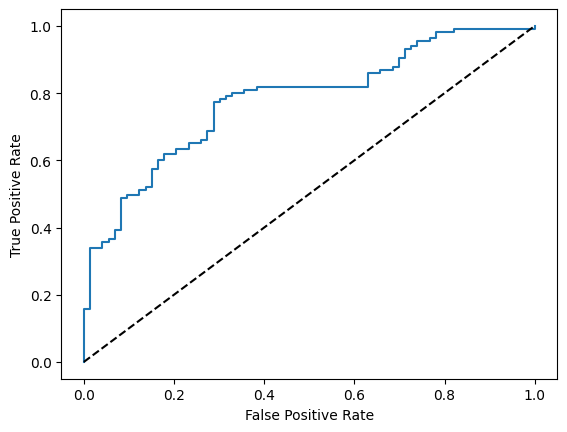

In [849]:
# Instantiate the classifier
clf = LogisticRegression()

scores, y_pred = predictive_model(clf)
results['LogisticRegression'] = scores
predictions['LogisticRegression'] = y_pred

Random Forest Classifier

Accuracy: 75%
Precision: 76%
Recall: 87%
AUC: 84%
F1 Score: 81%


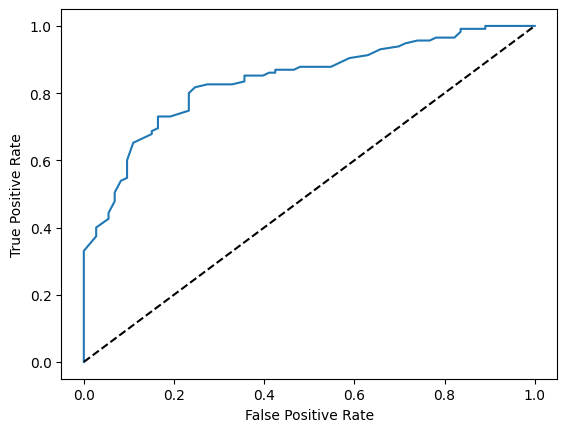

In [850]:
# Instantiate the classifier
clf = RandomForestClassifier()
scores, y_pred = predictive_model(clf)
results['RandomForestClassifier'] = scores
predictions['RandomForestClassifier'] = y_pred


Accuracy: 74%
Precision: 77%
Recall: 83%
AUC: 71%
F1 Score: 79%


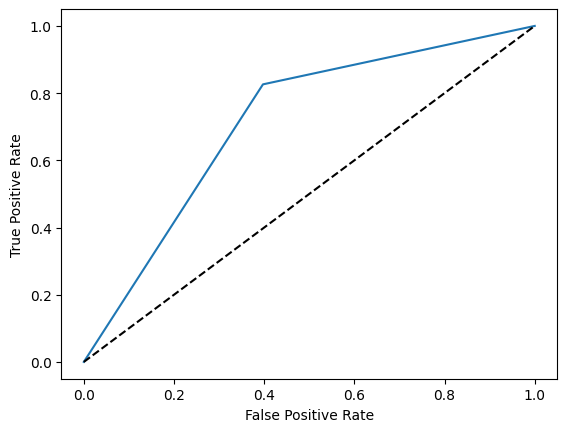

In [851]:
# Instantiate the classifier
clf = DecisionTreeClassifier()

scores, y_pred = predictive_model(clf)
results['DecisionTreeClassifier'] = scores
predictions['DecisionTreeClassifier'] = y_pred


In [852]:
df_results = pd.DataFrame.from_dict(results,columns=['accuracy','precision','recall','auc','f1_score'],orient='index').reset_index().rename(columns={'index':'model'})
df_results

,model,accuracy,precision,recall,auc,f1_score
0,LogisticRegression,0.654255,0.666667,0.869565,0.779392,0.754717
1,RandomForestClassifier,0.750000,0.757576,0.869565,0.838594,0.809717
2,DecisionTreeClassifier,0.739362,0.766129,0.826087,0.714413,0.794979


In [853]:
df_predictions = pd.DataFrame.from_dict(predictions,orient='columns')
df_predictions = df_predictions.reset_index().rename(columns={'index':'index_test'})
df_predictions

,index_test,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier
0,0,1,1,1
1,1,1,0,1
2,2,0,0,0
3,3,1,1,1
4,4,0,0,1
...,...,...,...,...
183,183,1,1,1
184,184,1,1,1
185,185,1,1,0
186,186,1,1,1


In [854]:
x_test_aux = X_test.reset_index().rename(columns={'level_0':'index_test'})[['index','index_test']]
aux = x_test_aux.merge(df_predictions[['index_test','RandomForestClassifier']],on='index_test')
predicted_results = aux.merge(matches,on='index')
predicted_results.sort_values(by='Date')

,index,index_test,RandomForestClassifier,ATP,Date,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year,H2H,QualityWin
73,9919,92,1,6,2008-01-14,Gasquet R.,Lindahl N.,8.0,254.0,3.0,1.0,5,2000,0,Outdoor_Hard,2008,Gasquet R._Lindahl N.,3.0
9,6011,43,1,5,2009-01-13,Gasquet R.,Tursunov D.,25.0,30.0,2.0,0.0,3,250,0,Outdoor_Hard,2009,Gasquet R._Tursunov D.,2.0
1,9889,91,1,49,2009-09-02,Nadal R.,Gasquet R.,3.0,46.0,3.0,0.0,5,2000,0,Outdoor_Hard,2009,Gasquet R._Nadal R.,2.0
29,5440,34,0,5,2010-01-11,Gasquet R.,Lopez F.,53.0,46.0,2.0,0.0,3,250,0,Outdoor_Hard,2010,Gasquet R._Lopez F.,2.0
72,9439,87,0,6,2010-01-19,Youzhny M.,Gasquet R.,20.0,52.0,3.0,2.0,5,2000,0,Outdoor_Hard,2010,Gasquet R._Youzhny M.,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,12758,142,1,27,2021-05-20,Gasquet R.,Schwartzman D.,52.0,10.0,2.0,0.0,3,250,1,Outdoor_Clay,2021,Gasquet R._Schwartzman D.,1.0
17,413,6,0,37,2021-07-12,Cecchinato M.,Gasquet R.,82.0,54.0,2.0,1.0,3,250,0,Outdoor_Clay,2021,Cecchinato M._Gasquet R.,2.0
28,6855,50,0,49,2021-08-31,Medvedev D.,Gasquet R.,2.0,79.0,3.0,0.0,5,2000,0,Outdoor_Hard,2021,Gasquet R._Medvedev D.,3.0
13,573,7,0,55,2021-10-18,Lajovic D.,Gasquet R.,33.0,73.0,2.0,0.0,3,250,0,Indoor_Hard,2021,Gasquet R._Lajovic D.,2.0
